In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [7]:
def equation_to_fit(x, Vmax, Kd):
    return (Vmax * x) / (Kd + x)

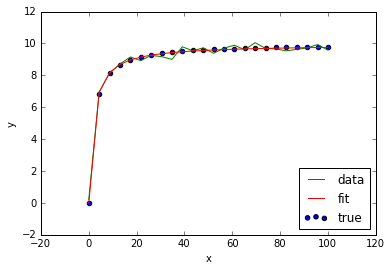

In [47]:
x_data = np.linspace(0, 100, 24)
y_truedata = func(x_data, 10, 2)

'''Create some noise and add it to the y values to represent experimental data'''
y_noise = 0.2 * np.random.normal(size=x_data.size)
y_noisedata = y_truedata + y_noise

'''Return the fitted paramaters and their covariance for the fitted curve'''
fit_params, covariance_of_params = curve_fit(equation_to_fit, x_data, y_noisedata, bounds=(0, [100, 1000]))

plt.scatter(x_data, y_truedata, c='b', label='true')
plt.plot(x_data, y_noisedata, c='g', label='data')
plt.plot(x_data, func(x_data, *fit_params), c='r', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.show()

In [58]:
print(fit_params)
print(covariance_of_params)

[ 9.93883757  1.88455428]
[[ 0.00367111  0.00658833]
 [ 0.00658833  0.02385041]]


In [59]:
std_dev_error_of_fit_params = np.sqrt(np.diag(covariance_of_params))

In [60]:
print(std_dev_error_of_fit_params)

[ 0.06058972  0.15443576]
